Laptop Ptice Prediction 

In [4]:
#importing pandas and numpys for manipulation 
import pandas as pd 
import numpy as np 

In [5]:
#importing the file and read the dataset
data=pd.read_csv(r"c:\Users\ajaym\Downloads\laptop.csv")

#to check the first 5 rows of dataset
data.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
unique_products = data['Company'].unique()
print(unique_products)

['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' nan 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [60]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,1303.00000,1273.000000,1273.000000
mean,651.00000,652.674784,59955.814073
std,376.28801,376.493027,37332.251005
min,0.00000,0.000000,9270.720000
25%,325.50000,327.000000,31914.720000
50%,651.00000,652.000000,52161.120000
75%,976.50000,980.000000,79333.387200
max,1302.00000,1302.000000,324954.720000


In [61]:
#checking for missing values 

missing_values=data.isnull().sum()
print(f'missing values {missing_values}')

missing values Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64


In [62]:
#drop the unnecessary columns 

data=data.drop(columns=['Unnamed: 0'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

print(type(df))

<class 'method'>


In [65]:
#preprocessing 

cat_col=['Company','TypeName','OpSys','Cpu','Gpu']
for col in cat_col:
    data[col] = LabelEncoder().fit_transform(data[col])


In [66]:
#converting weight col to numeric column 

data['Weight']=data['Weight'].astype(str)

# replacing ? with float(0)
data['Weight']=data['Weight'].replace('?', float('0'))

#removig any leading and trailing spces  and kg convert to float 
data['Weight']=data['Weight'].str.strip().str.replace('kg', '').astype(float)

#hand;ing NAN values with mean 
data['Weight']=data['Weight'].fillna(data['Weight'].mean())

print(data['Weight'].head())

0    1.37
1    1.34
2    1.86
3    1.83
4    1.37
Name: Weight, dtype: float64


In [67]:

# Standardize numerical columns by importing class ' StandardScalar'
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

data['Inches']=data['Inches'].astype(str)
data['Inches']=data['Inches'].replace('?', float('0'))
data['Inches']=data['Inches'].str.strip().astype(float)

num_cols = ['Inches', 'Weight']

# Apply standardization

data[num_cols] = scaler.fit_transform(data[num_cols])

# Step 5: Print first few rows to check the result

print(data[num_cols].head())


     Inches    Weight
0 -0.937118 -0.886932
1 -0.937118 -0.924534
2  0.240155 -0.272764
3  0.137783 -0.310366
4 -0.937118 -0.886932


In [69]:
# Importing the 'Seaborn' Library and 'pyplot' class from 'Matplotlib' Library

import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


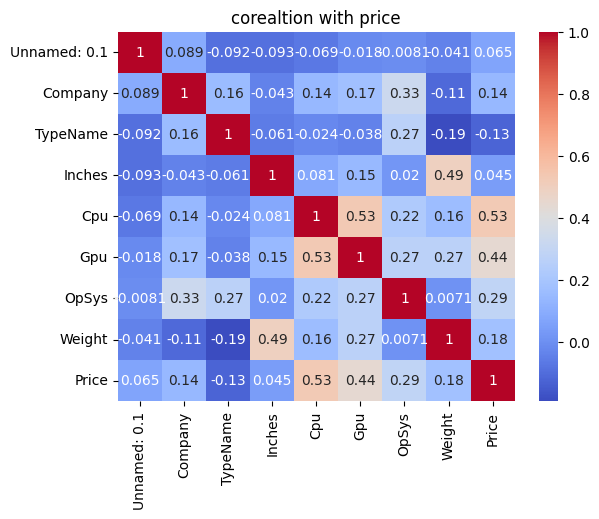

In [75]:
#checking coorelation with heatmap 

plt.Figure(figsize=(10,6))
#selecting only numerical columns 

numeric_data=data.select_dtypes(include=['float64','int64'])

#creating heatmap to visulaize realtion 

sns.heatmap(numeric_data.corr(),annot=True,cmap='coolwarm')
plt.title('corealtion with price')
plt.show()

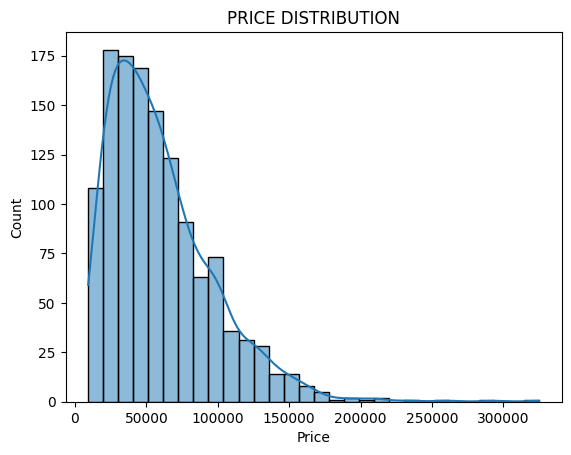

In [78]:
#checking distribution of price  with histogram 
sns.histplot(data['Price'],kde=True,bins=30)
plt.title('PRICE DISTRIBUTION')
plt.show()


In [80]:
print(data.columns)

Index(['Unnamed: 0.1', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')


Feature enginnering

In [81]:

# Importing the 'Train Test Split' function from the 'Model Selection' module of 'sklearn' Library to help split your data into training and testing sets

from sklearn.model_selection import train_test_split


# Importing the 'Linear Regression' class from the 'Linear Model' module of 'sklearn' Library to create a linear regression model

from sklearn.linear_model import LinearRegression


# Importing the 'Random Forest Regressor' class from the 'Ensemble' module of 'sklearn' Library to create a random forest regression model

from sklearn.ensemble import RandomForestRegressor


# Importing the 'Mean Squared Error (MSE)' and 'R2 Score' functions from the 'Metrics' module of 'sklearn' Library to evaluate the performance of models

from sklearn.metrics import mean_squared_error, r2_score


In [88]:
#splitting data into x  and y features 

X=data.drop(columns=['Price'])
y=data['Price']

# Apply one-hot encoding to categorical features

X = pd.get_dummies(X, drop_first=True)     # Drop the first category


In [89]:
X_train , X_test, y_train,y_test = train_test_split(X, y , test_size=0.2 , random_state=42)

In [96]:
import numpy as np 
# Linear Regression Model

from sklearn.impute import SimpleImputer


# Handle missing values by imputation (using the mean strategy)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
y_train = imputer.fit_transform(np.array(y_train).reshape(-1, 1)).ravel()


# Initialize the Linear Regression model
lr = LinearRegression()


# Fit the model to the training data
lr.fit(X_train, y_train)


# Make predictions on the test set
lr_preds = lr.predict(X_test)


In [98]:

# Initialize the Random Forest Regressor model
rf = RandomForestRegressor()

# FIt the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
rf_preds = rf.predict(X_test)


In [102]:

from sklearn.impute import SimpleImputer

imputer_y = SimpleImputer(strategy="mean")
y_test = imputer_y.fit_transform(np.array(y_test).reshape(-1, 1)).ravel()

print('Linear Regression:')

print('RMSE:', np.sqrt(mean_squared_error(y_test, lr_preds)))

print('R2 Score:', r2_score(y_test, lr_preds))



Linear Regression:
RMSE: 20720.700454428752
R2 Score: 0.6984025318007299


In [105]:

print('Random Forest Regressor:')

print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_preds)))

print('R2 Score:', r2_score(y_test, rf_preds))


Random Forest Regressor:
RMSE: 16823.697699336222
R2 Score: 0.8011792358695081


In [103]:

model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor'],

    'RMSE': [np.sqrt(mean_squared_error(y_test, lr_preds)),
              np.sqrt(mean_squared_error(y_test, rf_preds))],

    'R2 Score': [
        r2_score(y_test, lr_preds),
        r2_score(y_test, rf_preds)]
})

print(model_comparison)


                     Model          RMSE  R2 Score
0        Linear Regression  20720.700454  0.698403
1  Random Forest Regressor  16823.697699  0.801179


In [104]:

from sklearn.model_selection import GridSearchCV

# Defining the Hyperparamter Grid

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}


# Setting up Grid Search CV

grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)


# Fitting the Model

grid_search.fit(X_train, y_train)


# Selecting the Best Model

best_rf = grid_search.best_estimator_


# Making predictions and evaluating the Tuned Model

best_rf_preds = best_rf.predict(X_test)
mse = mean_squared_error(y_test, best_rf_preds)
rmse = np.sqrt(mse)
print("Tuned Random Forest RMSE:", rmse)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.3s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.3s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.3s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.7s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.7s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.8s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.3s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.3s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.3s
[CV] END .....................max_depth=10, n_estimators=200; total time=   0.6s
[CV] END .....................max_depth=10, n_estimators=200; total time=   0.6s
[CV] END .....................max_depth=10, n_est

In [108]:
print(lr_preds[:10])  # First 10 predictions from Linear Regression
print(rf_preds[:10])  # First 10 predictions from Random Forest


[65038.97047823 68890.85032711 12349.07006945 71072.71343969
 63644.27365344 55284.96226418 36588.33636397 35548.99616837
 66730.20521388 16507.56394201]
[61723.2816     76043.618928   30723.784128   49616.989344
 60161.42609057 60265.9172632  38059.726176   33623.814528
 67762.191312   16446.731472  ]


In [111]:
print(data['Price'].head())

0     71378.6832
1     47895.5232
2     30636.0000
3    135195.3360
4     96095.8080
Name: Price, dtype: float64


   Actual Price  Predicted Price
0  89084.160000     61723.281600
1  61218.720000     76043.618928
2  26586.720000     30723.784128
3  47898.720000     49616.989344
4  58711.738677     60161.426091


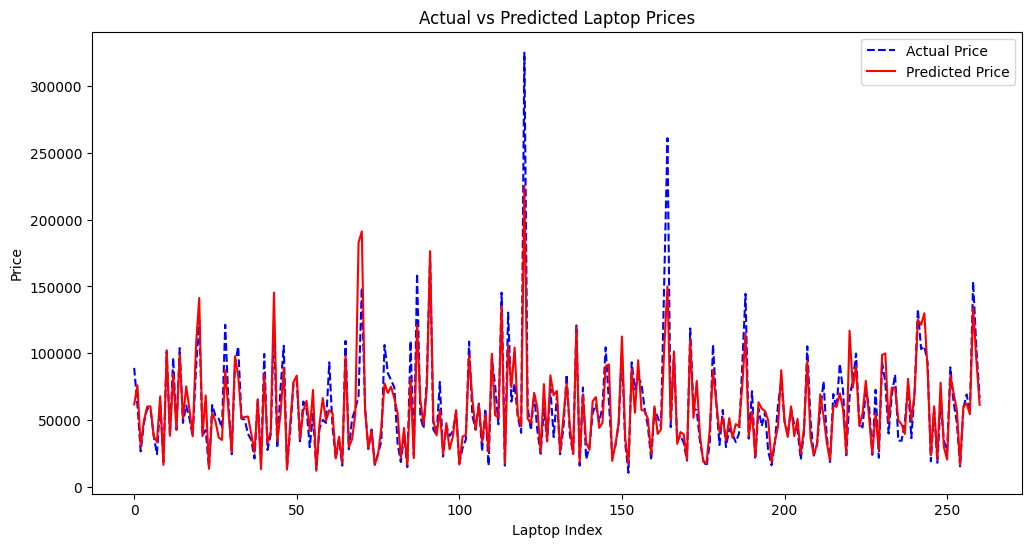

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for comparison
price_comparison = pd.DataFrame({
    'Actual Price': y_test, 
    'Predicted Price': rf_preds  # or lr_preds for Linear Regression
})

# Display the first few rows
print(price_comparison.head())

# Plot the comparison
plt.figure(figsize=(12, 6))
plt.plot(price_comparison['Actual Price'].values, label='Actual Price', color='blue', linestyle='dashed')
plt.plot(price_comparison['Predicted Price'].values, label='Predicted Price', color='red')
plt.xlabel('Laptop Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Laptop Prices')
plt.legend()
plt.show()
